In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original = pd.read_csv("ObesityDataSet.csv")

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
train.shape

(20758, 18)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Data cleaning
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
test.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [9]:
any(train.duplicated())

False

In [10]:
any(test.duplicated())

False

In [11]:
#EDA and Data Preprocessing

In [12]:
counts = train['NObeyesdad'].value_counts()

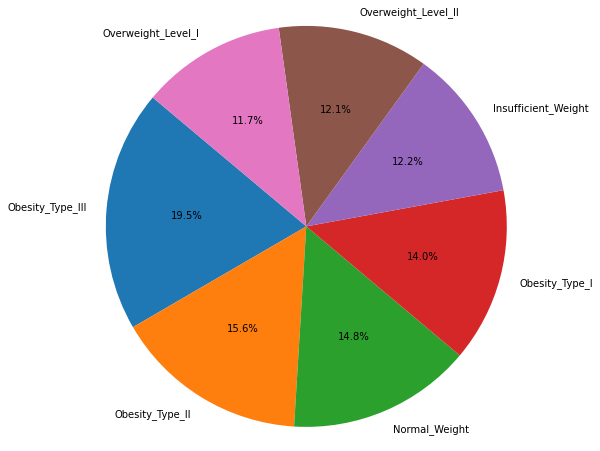

In [13]:
plt.figure(figsize=(8,8))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In the given distribution, 19.5% of them belongs to Obesity Type 3

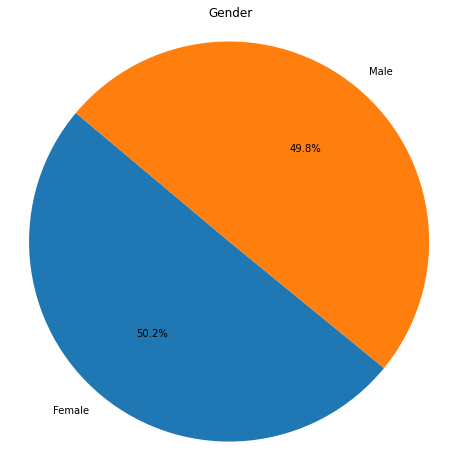

In [14]:
gender_counts = train['Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("Gender")
plt.show()

We have slightly more females than males in the distribution

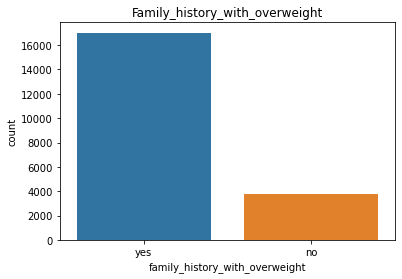

In [15]:
# Count plot
sns.countplot(x='family_history_with_overweight', data = train)
plt.title('Family_history_with_overweight')
plt.show()

There is lot with familyhistory of overweight in distribution

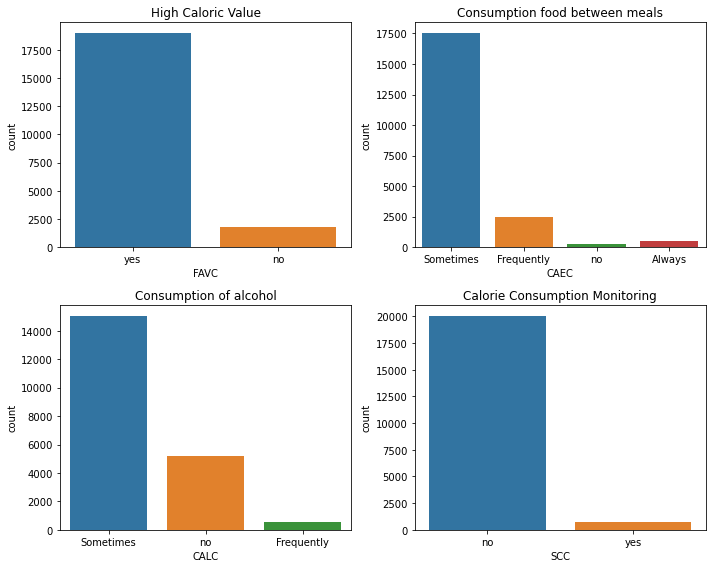

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.countplot(x='FAVC', data = train,ax=axes[0,0])
axes[0,0].set_title('High Caloric Value')

sns.countplot(x='CAEC', data = train,ax=axes[0,1])
axes[0,1].set_title('Consumption food between meals')

sns.countplot(x='CALC', data = train,ax=axes[1,0])
axes[1,0].set_title('Consumption of alcohol')

sns.countplot(x='SCC', data = train,ax=axes[1,1])
axes[1,1].set_title('Calorie Consumption Monitoring')


plt.tight_layout()
plt.show()






Lot of High caloric food consumption, 
sometimes consumption of food between meals,
sometimes consumption of alcohol,
no monitoring

In [17]:
smoke_counts = train['SMOKE'].value_counts()
trans_counts = train['MTRANS'].value_counts()

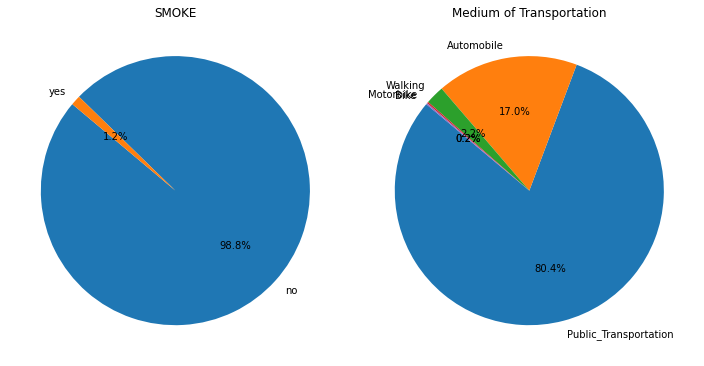

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,8))


axes[0].pie(smoke_counts,labels=smoke_counts.index,autopct='%1.1f%%',startangle=140)
axes[0].set_aspect('equal')
axes[0].set_title("SMOKE")


axes[1].pie(trans_counts,labels=trans_counts.index,autopct='%1.1f%%',startangle=140)
axes[1].set_aspect('equal')
axes[1].set_title("Medium of Transportation")

plt.tight_layout()
plt.show()


96.8 % no smoke and 80.4 % public transportation

In [19]:
numerical_columns = train.select_dtypes(include='number').columns

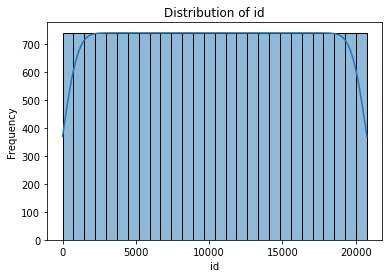

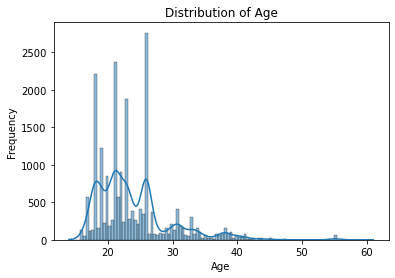

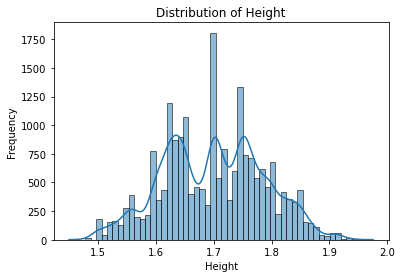

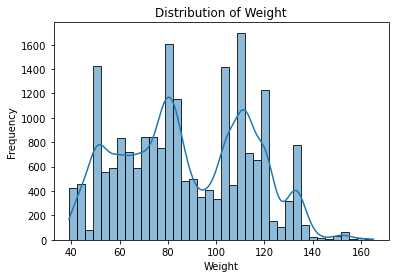

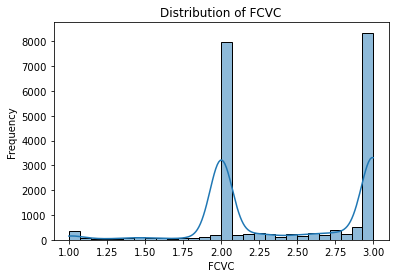

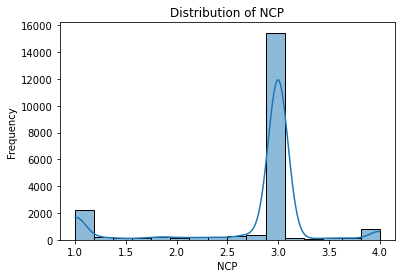

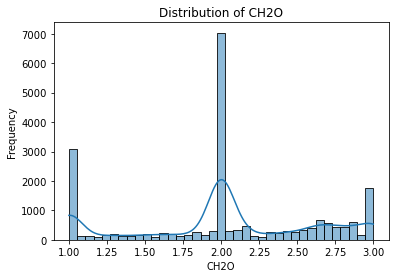

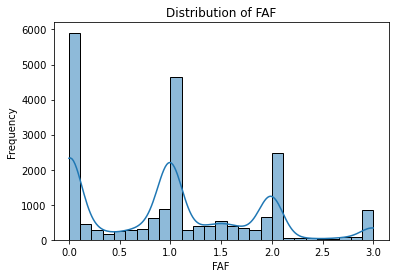

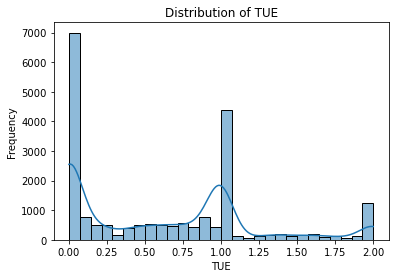

In [20]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
# Bivariate Plot
categorical_columns = train.select_dtypes(include='object').columns

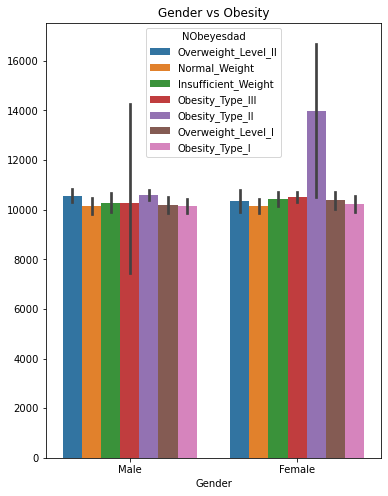

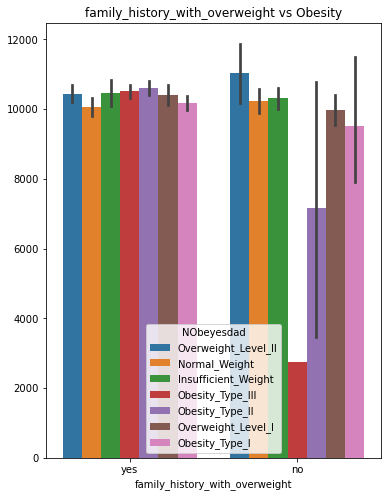

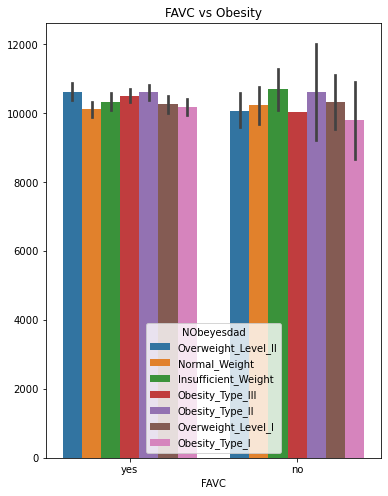

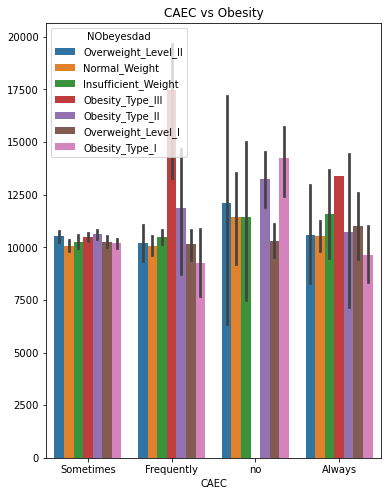

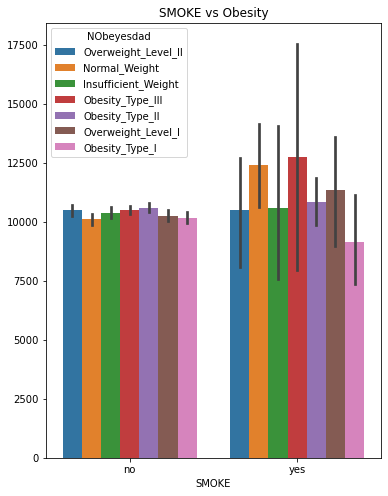

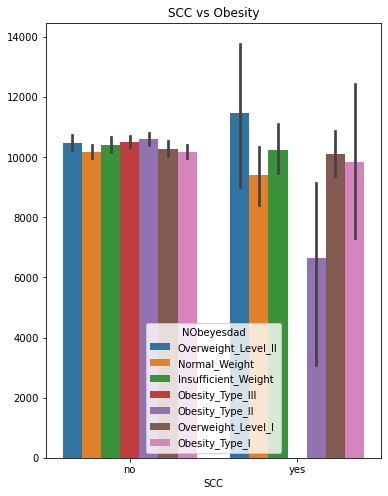

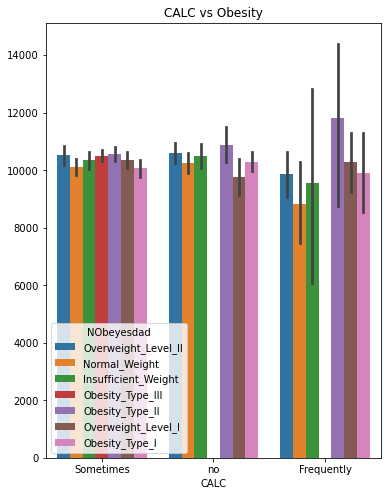

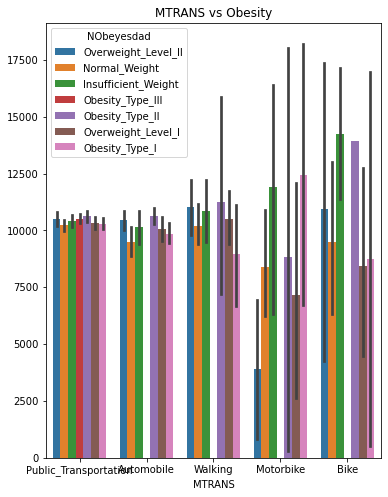

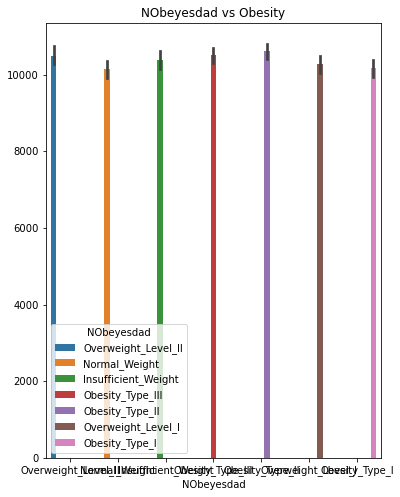

In [22]:
for col in categorical_columns :
    plt.figure(figsize=(6,8))
    sns.barplot(x=col,y=train.index,hue='NObeyesdad',data=train)
    plt.title(f'{col} vs Obesity')
    plt.xlabel(col)
    plt.show()

Large proportion of female fall under Obesity Type II

If you don't have a family history with overweight, there is less chance of obesity type III

major proportion of People who eat frequently food between meals(CEAC) falls under Obseity Type III
People who don't eat food between meals have almost 0% chance of falling into Obesity Type III
People who eat food between meals always will have higher chance of falling into Obesity Type III but less than frequently

major proportion of People who smokes  falls under normalweight and Obseity Type III
major proportion of People does calories consumption falls under Overweight level II and there is 0% chance of Obesity Type III compared to people who don't do the calculation

People who frequently consume alcohol and who doesn't consume alchol have 0% chance of Obseity Type III


In [23]:
# for col in numerical_columns:
#     for othercol in numerical_columns:
#         plt.figure(figsize=(6, 4))
#         sns.scatterplot(x=col,y=othercol,data=train,hue='NObeyesdad')
#         plt.title(f'{col}vs{othercol}')
#         plt.xlabel(col)
#         plt.ylabel(othercol)
#         plt.show()

People with age less than 20 most probably belong to normal weight and insufficient weight irrespective of height
People less than 60 kg weight are mostlikely to be in insuffiecient or normal weight.

In [24]:
train['NObeyesdad'].describe()

count                20758
unique                   7
top       Obesity_Type_III
freq                  4046
Name: NObeyesdad, dtype: object

In [25]:
original.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [26]:
corr_df = train.corr()

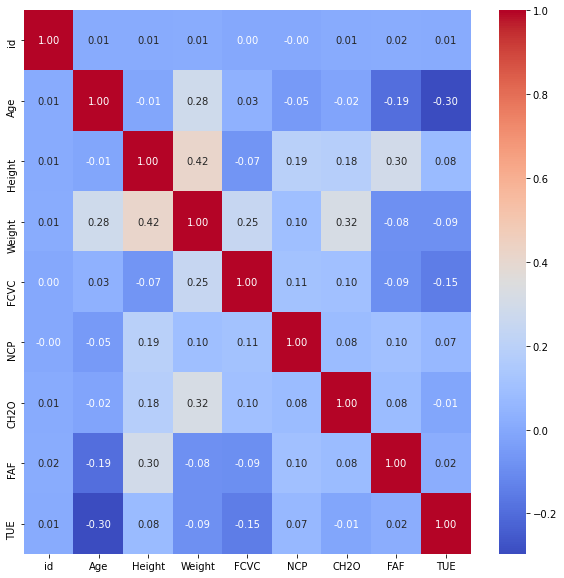

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [28]:
corr_ori = original.corr()

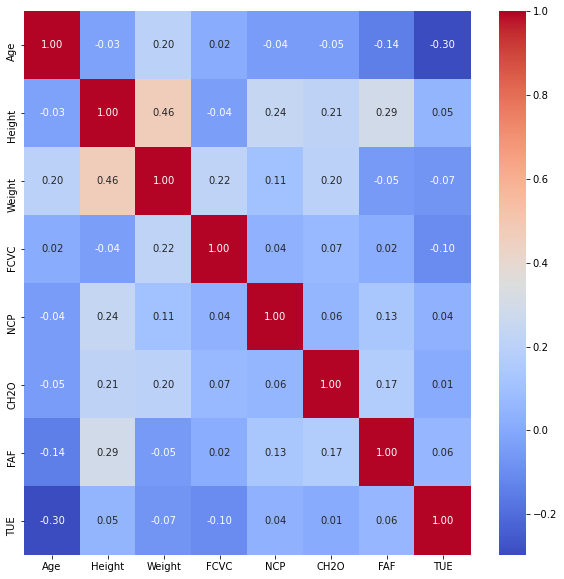

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_ori,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [30]:
# Preprocessing and feature engineering

In [31]:
train = pd.concat([train,original]).drop('id',axis=1).drop_duplicates()

In [32]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [33]:
X = train.drop('NObeyesdad',axis=1)
y = train['NObeyesdad']

In [34]:
columns=[]
for col in X.columns:
    if X[col].dtype == 'object':
        columns.append(col)

In [35]:
for col in test.columns:
    if test[col].dtype == 'object':
        print(col)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS


In [36]:
columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [37]:
X = pd.get_dummies(X,columns=columns)

In [38]:
test = pd.get_dummies(test)

In [39]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [40]:
test.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [41]:
X['BMI'] = X['Weight']/(X['Height']**2)

In [42]:
test['BMI'] = test['Weight']/(test['Height']**2)

In [43]:
submission = pd.DataFrame({'id':test['id']})

In [44]:
submission.head()

,id
0,20758
1,20759
2,20760
3,20761
4,20762


In [45]:
test = test.drop('id',axis=1)

In [46]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'BMI'],
      dtype='object')

In [47]:
X.shape

(22845, 32)

In [48]:
y.shape

(22845,)

In [49]:
encoder =LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded

array([6, 1, 0, ..., 4, 4, 4])

'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II' = [0,1,2,3,4,5,6]

In [50]:
X_train,X_valid,y_train,y_valid =train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [51]:
def prediction(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid,y_pred)
    print(f'{model}, score:{accuracy}')

In [52]:
# model_1 = LogisticRegression(max_iter=1000)
# prediction(model_1)

In [53]:
model_2 = XGBClassifier(n_estimators=500,n_iter=500,max_depth=9,learning_rate=0.01,objective='multi:softmax',num_class=7)
prediction(model_2)

[12:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_iter" } are not used.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_iter=500, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...), score:0.9089516305537316


In [54]:
# model_3 = CatBoostClassifier(n_estimators=500,learning_rate=0.01,max_depth=9,
#                             l2_leaf_reg= 0.038533,boosting_type='Ordered',
#                             random_seed=42)
# prediction(model_3)

In [55]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}

In [63]:
model_4 = LGBMClassifier(**best_params)
prediction(model_4)

LGBMClassifier(colsample_bytree=0.4097712934687264,
               lambda_l1=0.009667446568254372, lambda_l2=0.040186414373018,
               learning_rate=0.03096221154683276, max_depth=10,
               metric='multi_logloss', min_child_samples=26, n_estimators=500,
               num_class=7, objective='multiclass', random_state=42,
               subsample=0.9535797422450176, verbosity=-1), score:0.9170496826439046


In [64]:
test_prediction = model_4.predict(test)

In [57]:
test_prediction_1 = model_2.predict(test)

In [65]:
test_prediction

array([3, 5, 4, ..., 0, 1, 3])

In [66]:
test_prediction_1

array([3, 5, 4, ..., 0, 1, 3])

In [68]:
labels1=encoder.inverse_transform(test_prediction)

In [58]:
labels = encoder.inverse_transform(test_prediction_1)

In [59]:
labels

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [69]:
submission['NObeyesdad'] = labels1

In [70]:
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [71]:
submission.to_csv("submission.csv",index=False)